# Day 1

Introduction to crop modeling & Cropbox

<div class="alert alert-warning">
If figures/tables are not rendered correctly, make sure your notebook is `trusted` by choosing `Trust Notebook` command found in `View` - `Activate Command Palette` menu. Typing in the first letters (i.e. "tr") should give you the command.
</div>

In [1]:
using Cropbox

In [2]:
Cropbox.Interact.WebIO.setup(:ijulia)

WebIO._IJuliaInit()

## 1. Plant growth functions

A plant grows as it accumulates biomass ($W$) over time. This process can be expressed generically as $W = f(t)$. Many different growth functions are available to describe the growth patterns of plants, animals, and other organisms as an individual or in populations. While widely used and considered useful, most of these growth functions are empirical models unless they are founded in underlying mechanisms and sub-processes (*e.g.*, cell, tissue, or organ growth). [Thornley and Johnson (2000)](https://blackburnpress.com/biobook1.html) proposes two criteria for a growth function to be used in plant and crop modeling: 1) it should be derived from a differential equation for $\frac{dW}{dt}$, and 2) the parameters should be biologically meaningful.

### 1.1. Exponential growth

The most basic form is the simple exponential growth model which has been widely used in plant physiology and ecology for classical plant growth analysis ([Hunt et al. (2002)](https://doi.org/10.1093/aob/mcf214), [Paine et al. (2012)](https://doi.org/10.1111/j.2041-210X.2011.00155.x)).

- Eq 1.1

$$
\frac{dW}{dt} = rW
$$

- Table 1.1

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $t$ | - | $\mathrm{d}$ | Time unit used in the model |
| $r$ | 0.05 | $\mathrm{g}$ $\mathrm{g^{-1}}$ $\mathrm{d^{-1}}$ | Relative (or specific or intrinsic) growth rate |
| $W_0$ | 0.25 | $\mathrm{g}$ | Seed mass or initial biomass |
| $W$ | - | $\mathrm{g}$ | Whole-plant biomass as dry matter (state variable) |

Here is the model specification of Eq 1.1 implemented using Cropbox framework. See how variables and parameters are declared each line with state verbs (`track`, `preserve`, `accumulate`) and tags (*i.e.*, `parameter`, `init`, `u".."`).

- Time variable `t` is set to `track` internal time variable (`context.clock.time`) in the unit of `d` (day) converted from theg default `hr` (hour).
- Parameters `r` and `W0` are set to `preserve` their initial values which are declared in the body. They are tagged `parameter` indicating their values may be replaced by configuration when running simulations.
- As the state variable `W` is defined as a form of derivative ($\frac{dW}{dt}$), we want to integrate its value over time. As Cropbox is essentially a discrete-time modeling framework, what we do here is `accumulate` (summing up) instead of integration over continuous time.

In [3]:
@system Exponential(Controller) begin
    t(context.clock.time) ~ track(u"d")
    
    r:  relative_growth_rate    => 0.05 ~ preserve(parameter, u"g/g/d")
    W0: initial_biomass         => 0.25 ~ preserve(parameter, u"g")
    
    W(r, W): biomass => begin
        r * W
    end ~ accumulate(u"g", init = W0)
end

Exponential

`simulate(<System>; ..)` function make an instance of the model system and run simulation until `stop` condition is met. Here we use `300u"d"` as a stop condition which indicates the simulation should run for 300 days. The output of `simulate()` is a table-like DataFrame with column names from variables specified in the model. Let's name the variable storing the output `r11`, representing the result of Eq 1.1.

In [4]:
r11 = simulate(Exponential; stop = 300u"d")

Progress: 100%[===========================] Time: 0:00:02 ( 0.31 ms/it)


Row,time,t,r,W0,W
,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,0.0 d,0.05 d^-1,0.25 g,0.25 g
2,1.0 hr,0.0416667 d,0.05 d^-1,0.25 g,0.250521 g
3,2.0 hr,0.0833333 d,0.05 d^-1,0.25 g,0.251043 g
4,3.0 hr,0.125 d,0.05 d^-1,0.25 g,0.251566 g
5,4.0 hr,0.166667 d,0.05 d^-1,0.25 g,0.25209 g
6,5.0 hr,0.208333 d,0.05 d^-1,0.25 g,0.252615 g
7,6.0 hr,0.25 d,0.05 d^-1,0.25 g,0.253141 g
8,7.0 hr,0.291667 d,0.05 d^-1,0.25 g,0.253669 g
9,8.0 hr,0.333333 d,0.05 d^-1,0.25 g,0.254197 g


We can draw a graph with `visualize(<DataFrame>, <x>, <y>; ..)` function with the DataFrame output. By default, `kind` option is set to `:scatter` which could be inefficient to plot too many data points, so let's use `:line` to draw a simple line plot.

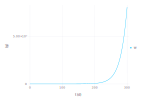

In [5]:
visualize(r11, :t, :W; kind = :line)

Can you recognize the exponential growth of biomass ($W$) in the plot? Do you think it's realistic?

While useful in practice, the assumption that a plant or its population will grow exponentially throughout their growing period is problematic. An exponential growth is only true during early stage, and is often followed by a linear then a saturation phase to cease the growth. This sigmoidal growth pattern is more realistic and physiologically sound.

By the way, some of you may have noticed that we had to include the initial biomass ($W_0$) in our model, even though the original equation didn't have one explicitly. Can you guess the reason? Let's try making a new model without the parameter and see how it works.

- Eq 1.1

$$
\frac{dW}{dt} = rW
$$

- Table 1.1

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $t$ | - | $\mathrm{d}$ | Time unit used in the model |
| $r$ | 0.05 | $\mathrm{g}$ $\mathrm{g^{-1}}$ $\mathrm{d^{-1}}$ | Relative (or specific or intrinsic) growth rate |
| $W_0$ | ~0.25~ | $\mathrm{g}$ | ~Seed mass or initial biomass~ |
| $W$ | - | $\mathrm{g}$ | Whole-plant biomass as dry matter (state variable) |

In [6]:
@system Exponential2(Controller) begin
    t(context.clock.time) ~ track(u"d")
    
    r:  relative_growth_rate    => 0.05 ~ preserve(parameter, u"g/g/d")
    
    W(r, W): biomass => begin
        r * W
    end ~ accumulate(u"g")
end

Exponential2

This time, we bypass a explicit run of simulation with `simulate()` but directly call `visualize()` to make a plot. Note the use of `stop` condition.

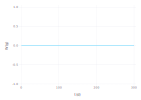

In [7]:
visualize(Exponential2, :t, :W; stop = 300u"d", kind = :line)

It's all zero. Is it expected? Can you guess what's the cause?

You can also make an interactive plot with `manipulate()` function to investigate the response of model more easily.

In [8]:
manipulate(Exponential, :t, :W;
    parameters = Exponential => (;
        r = 0:0.01:0.10,
        W0 = 0:0.01:10,
    ),
    stop = 300u"d",
    kind = :line,
    ylim = (0, 400),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["Exponential"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["r (d^-1)"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 11, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(6), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f20f1273de0, Task (runnable) @0x00007f20f1273de0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"fo

### 1.2. Logistic growth

One of the most widely used growth functions to depict the sigmoidal growth pattern is the logistic equation. If the final (or potential) biomass ($W_f$) is known, the rate of growth would slow down as the biomass ($W$) approaches $W_f$ as in Eq 1.2.

- Eq 1.2

$$
\frac{dW}{dt} = rW(1-\frac{W}{W_f}) = rW(\frac{W_f-W}{W_f})
$$

- Table 1.2

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $t$ | - | $\mathrm{d}$ | Time unit used in the model |
| $r$ | 0.05 | $\mathrm{g}$ $\mathrm{g^{-1}}$ $\mathrm{d^{-1}}$ | Relative (or specific or intrinsic) growth rate |
| $W_0$ | 0.25 | $\mathrm{g}$ | Seed mass or initial biomass |
| $W_f$ | 300 | $\mathrm{g}$ | Potential final mass of a plant |
| $W$ | - | $\mathrm{g}$ | Whole-plant biomass as dry matter (state variable) |

Let's incorporate the differential form (Eq 1.2) of the logistic equation using Cropbox package. Using the parameter values in Table 1.2, simulate both forms of the logistic model for 300 days on *daily time steps*. Plot to overlay the two forms in one figure and compare the results. Before running simulations, predict if you expect the results from both models to be identical? Why or why not? Do your simulations support your predictions? Why or why not? Test the behavior of the model with respect to its parameter values.

The model specification of Eq 1.2 is similar to the one we made for Eq 1.1, except a few things.

- Time variable `t` is set to `track` internal time variable (`context.clock.time`) in the unit of `d` (day) converted from theg default `hr` (hour).
- We now have an additional parameter `Wf` to indiciate the final biomass.
- Accordingly, the definition of state variable `W` is expanded to represent a logistic curve.

In [9]:
@system Logistic(Controller) begin
    t(context.clock.time) ~ track(u"d")
    
    r:  relative_growth_rate    => 0.05 ~ preserve(parameter, u"g/g/d")
    W0: initial_biomass         => 0.25 ~ preserve(parameter, u"g")
    Wf: potential_final_biomass => 300  ~ preserve(parameter, u"g")
    
    W(r, W, Wf): biomass => begin
        r * W * (Wf - W) / Wf
    end ~ accumulate(u"g", init = W0)
end

Logistic

We use the same `simulate()` function to run simulation.

In [10]:
r12 = simulate(Logistic; stop = 300u"d")

Row,time,t,r,W0,Wf,W
,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,0.0 d,0.05 d^-1,0.25 g,300.0 g,0.25 g
2,1.0 hr,0.0416667 d,0.05 d^-1,0.25 g,300.0 g,0.25052 g
3,2.0 hr,0.0833333 d,0.05 d^-1,0.25 g,300.0 g,0.251042 g
4,3.0 hr,0.125 d,0.05 d^-1,0.25 g,300.0 g,0.251564 g
5,4.0 hr,0.166667 d,0.05 d^-1,0.25 g,300.0 g,0.252088 g
6,5.0 hr,0.208333 d,0.05 d^-1,0.25 g,300.0 g,0.252613 g
7,6.0 hr,0.25 d,0.05 d^-1,0.25 g,300.0 g,0.253139 g
8,7.0 hr,0.291667 d,0.05 d^-1,0.25 g,300.0 g,0.253666 g
9,8.0 hr,0.333333 d,0.05 d^-1,0.25 g,300.0 g,0.254194 g


Then it's time to make a plot again using `visualize()` function.

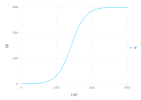

In [11]:
visualize(r12, :t, :W; kind = :line)

The same goes for an interactive plot using `manipulate()`.

In [12]:
manipulate(Logistic, :t, :W;
    parameters = Logistic => (;
        r = 0:0.01:0.20,
        W0 = 0:0.01:10,
        Wf = 100:500,
    ),
    stop = 300u"d",
    kind = :line,
    ylim = (0, 400),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["Logistic"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["r (d^-1)"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(11), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f20f0e33990, Task (runnable) @0x00007f20f0e33990), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"form

#### Configuration

Now think about the time step as we're meant to run simulation in *daily time steps*.

Model components (systems) in Cropbox have a default clock set in hourly time step (`context.clock.step` = `1u"hr"`). We can change the time step by providing a user configuration. Configuration is in a two-level mapping like `<System> => <Variable> => <Value>`. Cropbox provides several ways for constructing configurations and one simple way is to use a pair of pair with nested `=>`.

In [13]:
c = Clock => :step => 1u"d"

Clock => (:step => 1 d)

Here we make a configuration `c` for the system named `Clock` and want to set its parameter `step` to be `1u"d"` (1 day). We can take a look at how this pair of pair structure transformed into an actual instance of configuration by calling `@config` macro on it. This is how configurations supplied to `simulate()` are transformed and interpreted internally.

In [14]:
@config(c)

step,=,24 hr


Now we re-run the simulation with the custom configuration `c` for using daily time step.

In [15]:
r12d = simulate(Logistic; config = c, stop = 300u"d")

Row,time,t,r,W0,Wf,W
,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,0.0 d,0.05 d^-1,0.25 g,300.0 g,0.25 g
2,24.0 hr,1.0 d,0.05 d^-1,0.25 g,300.0 g,0.26249 g
3,48.0 hr,2.0 d,0.05 d^-1,0.25 g,300.0 g,0.275603 g
4,72.0 hr,3.0 d,0.05 d^-1,0.25 g,300.0 g,0.28937 g
5,96.0 hr,4.0 d,0.05 d^-1,0.25 g,300.0 g,0.303825 g
6,120.0 hr,5.0 d,0.05 d^-1,0.25 g,300.0 g,0.319 g
7,144.0 hr,6.0 d,0.05 d^-1,0.25 g,300.0 g,0.334934 g
8,168.0 hr,7.0 d,0.05 d^-1,0.25 g,300.0 g,0.351661 g
9,192.0 hr,8.0 d,0.05 d^-1,0.25 g,300.0 g,0.369224 g


Note that `t` values are now one day (`1u"d"`) apart.

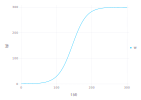

In [16]:
visualize(r12d, :t, :W; kind = :line)

Can you see the difference between the results using different time steps?

We can overlay multiple plots with consecutive calls of `visualize!(<Plot>, ...)` with a Plot object returned by previous `visualize()` or `visualize!()` function.

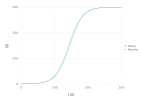

In [17]:
p = visualize(r12d, :t, :W; kind = :line, name = "Daily")
visualize!(p, r12, :t, :W; kind = :line, name = "Hourly")

### 1.3. Logisitc growth (integrated form)

- Eq 1.3

$$
W = \frac{W_0 W_f}{W_0 + (W_f-W_0)e^{-rt}} = \frac{W_f}{1 + (\frac{W_f}{W_0}-1)e^{-rt}}
$$

- Table 1.3

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $t$ | - | $\mathrm{d}$ | Time unit used in the model |
| $r$ | 0.05 | $\mathrm{g}$ $\mathrm{g^{-1}}$ $\mathrm{d^{-1}}$ | Relative (or specific or intrinsic) growth rate |
| $W_0$ | 0.25 | $\mathrm{g}$ | Seed mass or initial biomass |
| $W_f$ | 300 | $\mathrm{g}$ | Potential final mass of a plant |
| $W$ | - | $\mathrm{g}$ | Whole-plant biomass as dry matter (state variable) |

The specification of logistic model `Logistic2` using an integral form looks similar to `Logistic` except that the state variable `W` is no longer a part of the derivative, but already included in the form of integral. Thus, what we need here is to just re-calculate `W` every time step, instead of doing accumulation / integration based on previous values. `track` is used for such variables whose values can be solely derived from the current state of system, without needing to keep track of previous states.

In [18]:
@system Logistic2(Controller) begin
    t(context.clock.time) ~ track(u"d")
    
    r:  relative_growth_rate    => 0.05 ~ preserve(parameter, u"g/g/d")
    W0: initial_biomass         => 0.25 ~ preserve(parameter, u"g")
    Wf: potential_final_biomass => 300  ~ preserve(parameter, u"g")
    
    W(r, W0, Wf, t): biomass => begin
        Wf / (1 + ((Wf / W0) - 1) * exp(-r*t))
    end ~ track(u"g")
end

Logistic2

In [19]:
r13 = simulate(Logistic2; config = c, stop = 300u"d")

Row,time,t,r,W0,Wf,W
,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,0.0 d,0.05 d^-1,0.25 g,300.0 g,0.25 g
2,24.0 hr,1.0 d,0.05 d^-1,0.25 g,300.0 g,0.262807 g
3,48.0 hr,2.0 d,0.05 d^-1,0.25 g,300.0 g,0.276269 g
4,72.0 hr,3.0 d,0.05 d^-1,0.25 g,300.0 g,0.290419 g
5,96.0 hr,4.0 d,0.05 d^-1,0.25 g,300.0 g,0.305294 g
6,120.0 hr,5.0 d,0.05 d^-1,0.25 g,300.0 g,0.32093 g
7,144.0 hr,6.0 d,0.05 d^-1,0.25 g,300.0 g,0.337366 g
8,168.0 hr,7.0 d,0.05 d^-1,0.25 g,300.0 g,0.354643 g
9,192.0 hr,8.0 d,0.05 d^-1,0.25 g,300.0 g,0.372803 g


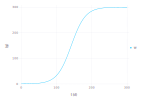

In [20]:
visualize(r13, :t, :W; kind = :line)

#### Comparison

Let's compare two versions of logistic models. As mentioned, Cropbox provides some high-level plotting functions to make a plot without manually running simulations first. One form of such `visualize()` functions is `visualize([<System>..], <x>, <y>; <simulate() options>.., <plotting options..>)` to make a plot with multiple overlays in one line of code.

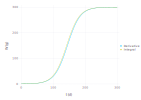

In [21]:
visualize([Logistic, Logistic2], :t, :W;
    config = c,
    stop = 300u"d",
    kind = :line,
    names = ["Derivative", "Integral"],
)

Again, you may now notice a small difference between two implementations of logistic growth models. Which one do you think is more accurate?

## 2. Exercises

#### Ex 1.1.

Now it's time for you to have some hands-on experience. Try making the logistic model yourself by looking at the equation and parameter table. Here is a template with some code got removed and replaced by a comment block (`#= =#`). Write your own code there and feel free to ask any questions.

- Eq 1.2

$$
\frac{dW}{dt} = rW(1-\frac{W}{W_f}) = rW(\frac{W_f-W}{W_f})
$$

- Table 1.2

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $t$ | - | $\mathrm{d}$ | Time unit used in the model |
| $r$ | 0.05 | $\mathrm{g}$ $\mathrm{g^{-1}}$ $\mathrm{d^{-1}}$ | Relative (or specific or intrinsic) growth rate |
| $W_0$ | 0.25 | $\mathrm{g}$ | Seed mass or initial biomass |
| $W_f$ | 300 | $\mathrm{g}$ | Potential final mass of a plant |
| $W$ | - | $\mathrm{g}$ | Whole-plant biomass as dry matter (state variable) |

In [22]:
@system MyLogistic(Controller) begin
    t(context.clock.time) ~ track(u"d")
    
    r:  relative_growth_rate    => #= =# ~ preserve(#= =#, u"g/g/d")
    W0: initial_biomass         => #= =# ~ preserve(parameter, #= =#)
    Wf: potential_final_biomass => #= =# ~ #= =#(#= =#, #= =#)
    
    W(#= =#): biomass => begin
        #= =#
    end ~ accumulate(u"g", init = #= =#)
end

MyLogistic

#### Ex 1.2.

Run simulation for 300 days and save the output in a DataFrame.

In [23]:
mr = simulate(MyLogistic; stop = 300u"d")

Row,time,t,r,W0,Wf,W
,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,0.0 d,0.05 d^-1,0.25 g,300.0 g,0.25 g
2,1.0 hr,0.0416667 d,0.05 d^-1,0.25 g,300.0 g,0.25052 g
3,2.0 hr,0.0833333 d,0.05 d^-1,0.25 g,300.0 g,0.251042 g
4,3.0 hr,0.125 d,0.05 d^-1,0.25 g,300.0 g,0.251564 g
5,4.0 hr,0.166667 d,0.05 d^-1,0.25 g,300.0 g,0.252088 g
6,5.0 hr,0.208333 d,0.05 d^-1,0.25 g,300.0 g,0.252613 g
7,6.0 hr,0.25 d,0.05 d^-1,0.25 g,300.0 g,0.253139 g
8,7.0 hr,0.291667 d,0.05 d^-1,0.25 g,300.0 g,0.253666 g
9,8.0 hr,0.333333 d,0.05 d^-1,0.25 g,300.0 g,0.254194 g


#### Ex 1.3.

Make a plot of the model simulation output.

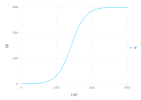

In [24]:
visualize(r12, :t, :W; kind = :line)

#### Ex 1.4.

Create an interactive plot and see how the model responds to the changes of parameter values (`r`, `W0`, and `Wf`).

In [25]:
manipulate(MyLogistic, :t, :W;
    parameters = MyLogistic => (;
        r = 0.01:0.01:0.20,
        W0 = 0:0.01:10,
        Wf = 100:500,
    ),
    stop = 300u"d",
    kind = :line,
    ylim = (0, 400),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["MyLogistic"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["r (d^-1)"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 20, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(10), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f2093c41710, Task (runnable) @0x00007f2093c41710), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"fo

## 3. Cropbox

[Cropbox](https://github.com/cropbox/Cropbox.jl) is a modeling framework developed at the University of Washington to support development of crop models.

### 3.1. Model specification

We now start using Cropbox framework to make a very simple exponential growth model adapted from an example introduced in the manual of [Fortran Simulation Translator](https://library.wur.nl/WebQuery/wurpubs/302463) which used to be an underlying framework for many early crop models.

Here is the original equation of the model. Initial value of $x$ is 1. We assume the units are in grams (`u"g"`) and daily (`u"d"`) measurements.

$$\frac{dx}{dt} = ax$$

We now represent this model in a **system** named `S` which contains the state variable `x` and other supporting variables.

In [26]:
@system S(Controller) begin
    i:       initial_value   => 1   ~ preserve(u"g")
    a:       parameter_value => 0.1 ~ preserve(u"d^-1", parameter)
    r(a, x): rate_variable   => a*x ~ track(u"g/d")
    x(r):    state_variable         ~ accumulate(u"g", init = i)
end

S

Here we declared four variables.
- `i`: variable containing initial value of `x` which never changes (*preserved*)
- `a`: variable containing constant **parameter** of exponential growth
- `r`: rate variable which needs to be calculated or *tracked* every time step
- `x`: state variable which *accumulates* by rate `r` over time with initial value `i`

We can visualize dependency graph between variables defined in our system `S` by using some internal functions provided by the framework.

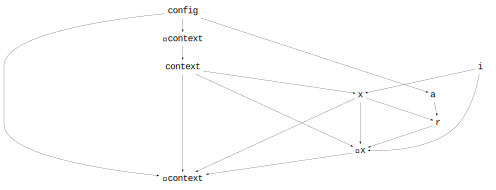

In [27]:
Cropbox.dependency(S)

For example, it's clear to see `r` depends on two variables `x` and `a`. There are some auxiliary nodes (prefixed with $\circ$/$\star$) and implicit variables (*i.e.* `config`, `context`) not declared in our model specification and we will discuss them later.

### 3.2. Model simulation

Let's run the model for simulation. While you can directly instantiate your model by calling `instance(S)`, here we  will use a helper function `simulate()` for simplicity. It will internally instantiate the model, update it for a given number of iterations and return the result packed in a `DataFrame`. By default, columns will include `tick` variable from internal `Clock` and all state variables defined in the target system.

In [28]:
r = simulate(S; stop = 100u"d")

Row,time,i,a,r,x
,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,1.0 g,0.1 d^-1,0.1 g d^-1,1.0 g
2,1.0 hr,1.0 g,0.1 d^-1,0.100417 g d^-1,1.00417 g
3,2.0 hr,1.0 g,0.1 d^-1,0.100835 g d^-1,1.00835 g
4,3.0 hr,1.0 g,0.1 d^-1,0.101255 g d^-1,1.01255 g
5,4.0 hr,1.0 g,0.1 d^-1,0.101677 g d^-1,1.01677 g
6,5.0 hr,1.0 g,0.1 d^-1,0.102101 g d^-1,1.02101 g
7,6.0 hr,1.0 g,0.1 d^-1,0.102526 g d^-1,1.02526 g
8,7.0 hr,1.0 g,0.1 d^-1,0.102953 g d^-1,1.02953 g
9,8.0 hr,1.0 g,0.1 d^-1,0.103382 g d^-1,1.03382 g


Note that `time` is in hourly units (`u"hr"`) by default.

#### 3.2.1. Plotting

As the result is backed by [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl), we can easily hand it off to other Julia packages for further analysis. Cropbox framework also provides a handy `visualize()` function for simple visualization.

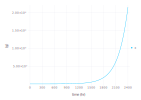

In [29]:
visualize(r, :time, :x; kind = :line)

#### 3.2.2. Configuration

Note that the rate of growth `a` is a *parameter* in our model. In modeling, we often need to change the value of a parameter for different systems or species. We can change its value before running the model. Let's try smaller value of 0.05 instead of default 0.1.

In [30]:
c = @config S => :a => 0.05

a,=,0.05 d^-1


In [31]:
r2 = simulate(S, config = c, stop = 100u"d");

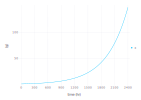

In [32]:
visualize(r2, :time, :x; kind = :line)

Now we can confirm that the exponential growth became much slower than the previous simulation by using a smaller rate parameter.

### 3.3. Model internals

When we specify our model with `@system` macro, Cropbox automatically generates some code behind the scene for handling model setup and update. With our exponential growth model, it would mean we get `struct` named `S` and `update!(::S, ..)` for example. We can take a look at the actual code generatd during this process by using [`@macroexpand`](https://docs.julialang.org/en/v1/base/base/#Base.macroexpand).

In [33]:
@macroexpand @system S(Controller) begin
    i:       initial_value   => 1   ~ preserve(u"g")
    a:       parameter_value => 0.1 ~ preserve(u"d^-1", parameter)
    r(a, x): rate_variable   => a*x ~ track(u"g/d")
    x(r):    state_variable         ~ accumulate(u"g", init = i)
end

quote
    #= /opt/julia/packages/Cropbox/aE8bI/src/macro.jl:460 =#
    begin
        $(Expr(:meta, :doc))
        abstract type S <: System end
    end
    #= /opt/julia/packages/Cropbox/aE8bI/src/macro.jl:461 =#
    S(; var"#895#kw"...) = begin
            #= /opt/julia/packages/Cropbox/aE8bI/src/macro.jl:461 =#
            var"##_S#428"(; var"#895#kw"...)
        end
    #= /opt/julia/packages/Cropbox/aE8bI/src/macro.jl:462 =#
    (Cropbox.Cropbox).typefor(::Cropbox.Type{<:S}) = begin
            #= /opt/julia/packages/Cropbox/aE8bI/src/macro.jl:462 =#
            var"##_S#428"
        end
    #= /opt/julia/packages/Cropbox/aE8bI/src/macro.jl:463 =#
    let var"#893###CS#431" = Cropbox.merge(Cropbox.constsof.(Cropbox._mixincollect(Cropbox.mixinsof(Main, [:System, :Controller])))..., Cropbox.Dict(:__Context__ => Cropbox.typefor(Cropbox.Context))), var"#894#__Context__" = var"#893###CS#431"[:__Context__], var"#894#__Context__" = var"#893###CS#431"[:__Context__]
        #= /opt/julia/pa

#### 3.3.1. Syntax

`@system` macro accepts lines of variable declaration specified by its own syntax. They are loosely based on Julia syntax sharing common expressions and operators, but have distinct semantics explained as below. In other words, they form a domain-specific language (DSL) specifically designed for our crop modeling framework.

`name[(args..; kwargs..)][: alias] [=> expr] [~ [state][::type|<:type][(tags..)]]`

- `name`: variable name; usually short abbreviation.
- `args`: automatically bound depending variables
- `kwargs`: custom bound depending variables; used by `call` and `integrate`.
- `alias`: alternative name; long description.
- `expr`: state-specific code snippet; use begin-end block for multiple statements.
- `type`: internal data type; default is Float64 for many, but not all, variables.
- `tags`: state-specific options; `unit`, `min`/`max`, etc.

Here is a hypothetical model specification showing various uses of syntax elements.

In [34]:
@system MySystem begin
    a: my_precious_param => 1 ~ preserve::Int(parameter)
    b(a) => begin
        2a
    end ~ track
    c                     ~ ::String(override)
    f(b; x, y) => b*(x+y) ~ call
    g(f)       => f(1, 2) ~ track
end

MySystem

By the way, although looking verbose and suspicious, `MySystem` is still on a valid specification and you can visualizae its dependency graph of state variables without any problem.

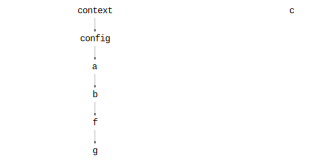

In [35]:
Cropbox.dependency(MySystem)

#### 3.3.2. State

There are a number of built-in `State` verbs that can be used in model specification.

- `hold`: marks a placeholder for variable shared between mixins.
- `wrap`: passes a state variable to other fucnction as is with no unwrapping its value.
- `advance`: manages a time-keeping variable; `time` and `tick` from `Clock`.
- `preserve`: keeps initially assigned value with no further updates; constants, parameters.
- `tabulate`: makes a two dimensional table with named keys; *i.e.* partitioning table.
- `interpolate`: makes a curve function interpolated with discrete values; *i.e.* soil characteristic curve.
- `track`: evaluates variable expression as is for each update.
- `remember`: keeps tracking variable until a certain condition is met; essentially `track` turning into `preserve`.
- `provide`: manages a table of time-series in DataFrame.
- `drive`: fetches the current value from a time-series; maybe supplied by `provide`.
- `call`: defines a partial function bound with some variables.
- `integrate`: calculates integral using Gaussian method; not for time domain.
- `accumulate`: emulates integration of rate variable over time; essentially Euler method.
- `capture`: calculates difference between integration for each time step.
- `flag`: sets a boolean flag; essentially `track::Bool`.
- `produce`: attaches a new instance of system dynamically constructed; *i.e.* root structure growth.
- `bisect`: solves nonlinear equation using bisection method; *i.e.* gas-exchange model coupling.
- `solve`: solves polynomial equation symbolically; *i.e.* quadratic equations in photosynthesis model.

Internally, each kind directly maps to a Julia `struct` with its name capitalized. For example, `track` kind maps to `Track` struct.

#### 3.3.3. System

`System` is a container that contains a number of *variables*. Once defined, its structure gets fixed that no additional variables can get added or removed, but the state of variables can be still updated throughout time steps.

`System` may include other `System` as its component. In such case, kind of `state` would be empty and type of included `System` should be defined in the variable declaration. Indeed, every `System` by default includes a `System` called `Context` referred by `context` variable. We can visualize hierarchy of systems using `Cropbox.hierarchy()`.

For example, we can visually confirm that `S` *has* a `Context` which *has* a `Clock`. Note that `S` also *is* a `Controller` indicating that it works as an entry of model.

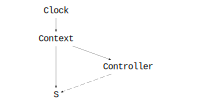

In [36]:
Cropbox.hierarchy(S)

In order to get a model that can be run, we need to make an instance of `System`. It can be done by calling `instance()` function on the type of `System` with `Controller` mixin.

In [37]:
s = instance(S)

context,,=,<Context>
config,,=,<Config>
i,(initial_value),=,1.0 g
a,(parameter_value),=,0.1 d^-1
r,(rate_variable),=,0.1 g d^-1
x,(state_variable),=,1.0 g


Here, we just made an instance of `S` which is referred by a variable name `s`.

#### 3.3.4. Simulation

Now we can call `simulate!()` to update its internal states for one time step.

In [38]:
simulate!(s)

Row,time,i,a,r,x
,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,1.0 g,0.1 d^-1,0.1 g d^-1,1.0 g


If you want to run for more than one time step, the number of iterations can be specfied.

In [39]:
simulate!(s; stop = 2)

Row,time,i,a,r,x
,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,1.0 g,0.1 d^-1,0.1 g d^-1,1.0 g
2,1.0 hr,1.0 g,0.1 d^-1,0.100417 g d^-1,1.00417 g
3,2.0 hr,1.0 g,0.1 d^-1,0.100835 g d^-1,1.00835 g


Instead of calling `simulate!()` after `instance()`, `simulate()` can do both at the same time as we already saw earlier. Note that `simulate()` works with the type of `System` whereas `simulate!()` works with an instance of such `System`. Note that Julia follows a convention that function ending with `!` can change or mutate any arguments supplied to the function.

In [40]:
simulate(S; stop = 3)

Row,time,i,a,r,x
,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,1.0 g,0.1 d^-1,0.1 g d^-1,1.0 g
2,1.0 hr,1.0 g,0.1 d^-1,0.100417 g d^-1,1.00417 g
3,2.0 hr,1.0 g,0.1 d^-1,0.100835 g d^-1,1.00835 g
4,3.0 hr,1.0 g,0.1 d^-1,0.101255 g d^-1,1.01255 g


#### 3.3.5. Inspection

Cropbox provides `look()` function (and equivalent `@look` macro) which is a handy tool for inspecting internal states of `System` and/or instance of the system. Cropbox also provide `dive()` function for interactive navigating in and out of the variables, but it only works in terminal REPL environment, not in Jupyter Notebook [yet](https://github.com/JuliaLang/IJulia.jl/issues/801).

In [41]:
look(s)

[doc]

[system]
S
  context = <Context>
  config = <Config>
  i (initial_value) = 1.0 g
  a (parameter_value) = 0.1 d^-1
  r (rate_variable) = 0.100835 g d^-1
  x (state_variable) = 1.00835 g

In [42]:
@look s.a

[doc]

[code]
  a:parameter_value => 0.1 ~ preserve(u"d^-1", parameter)

[value]
0.1 d^-1

#### 3.3.6. Controller

Due to some technical implications regarding performance, any `System` that wants to be a direct target of instantiation is required to include `Controller` mixin in its specification. Remember we had `@system S(Controller) ..`, not just `@system S ..` in our first example.

#### 3.3.7. Mixin

[Mixin](https://en.wikipedia.org/wiki/Mixin) is a piece of `System` specification that can be included in the specification of larger `System`. Each mixin implements an own set of variables and some of them may be linked with variables from other `System` when a new `System` is formed. Mixins are declared by giving a list of them enclosed within parentheses after the name of `System` in the specification.

Here is an example of mixin where `S3` is composed by including `S1` and `S2` as mixins.

In [43]:
@system S1 begin
    a    => 1  ~ preserve
    b(a) => 2a ~ track
end

S1

In [44]:
@system S2 begin
    a       => 2   ~ preserve
    b(a, c) => a*c ~ track
    c       => 1   ~ preserve
end

S2

In [45]:
@system S3(S1, S2) begin
    d(a) => 3a ~ preserve
end

S3

We can take a look at the actual specification of `S3` after mixins were included by calling `@look`.

In [46]:
@look S3

[doc]

[system]
S3
  context
  config
  a
  b
  c
  d

Note that the specification of variable `a` in `S3` came from `S2`, not `S1`. `a` from `S1` with the default value of 1 was overridden by `S2` where the default value was 2.

In [47]:
@look S3.a

[doc]

[code]
  a => 2 ~ preserve

The same goes for variable `b` as the specification of variables from `S1` mixin were overridden by ones from `S2` mixin. In other words, the order of mixins is important.

In [48]:
@look S3.b

[doc]

[code]
  b(a, c) => a * c ~ track

It may help understanding mixins by visualizaing their structure.

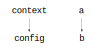

In [49]:
Cropbox.dependency(S1)

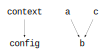

In [50]:
Cropbox.dependency(S2)

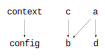

In [51]:
Cropbox.dependency(S3)

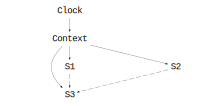

In [52]:
Cropbox.hierarchy(S3)

Here `S3` *includes* `S1` and `S2`. `S3` *has* a `Context` which has a `Clock`.

#### 3.3.8. Alias

Let's take a look into the instance `s` created for the system `S` again.

In [53]:
s = instance(S)

context,,=,<Context>
config,,=,<Config>
i,(initial_value),=,1.0 g
a,(parameter_value),=,0.1 d^-1
r,(rate_variable),=,0.1 g d^-1
x,(state_variable),=,1.0 g


We have a state variable `x` which is declared as a kind of `accumulate`. The actual code for calculating the rate for this variable resembles its corresponding mathematical equation. Note that `r` and `x` are short abbreviations for longer names `rate_variable` and `state_variable`, respectively. By having a descriptive long alias which can be also referred by a short name, we keep our model specification concise without losing expressivity.

In [54]:
s.x

1.0 g

In [55]:
s.state_variable

1.0 g

#### 3.3.9. State vs. Value

`s.state_variable` and `s.x` both point to an instance of the exactly same state variable.

In [56]:
s.state_variable === s.x

true

Note that what they return is not an actual value stored in the state variable, but the data structure (of type `State`) which is essentially a wrapper around the actual value. We can get the type of variable by calling `typeof()` function provided by Julia.

In [57]:
typeof(s.x)

Cropbox.Accumulate{Unitful.Quantity{Float64, 𝐌, Unitful.FreeUnits{(g,), 𝐌, nothing}}, Unitful.Quantity{Float64, 𝐓, Unitful.FreeUnits{(hr,), 𝐓, nothing}}, Unitful.Quantity{Float64, 𝐌 𝐓^-1, Unitful.FreeUnits{(g, hr^-1), 𝐌 𝐓^-1, nothing}}}

To get an actual value stored in the state variable, we can use `value()` function from Cropbox.

In [58]:
value(s.x)

1.0 g

Alternatively, we can also use postfix adjoint operator `'` and dereference operator `[]` which are specifically defined as a shortcut to `Cropbox.value()` in the case of `State` type.

In [59]:
s.x'

1.0 g

In [60]:
typeof(s.x')

Unitful.Quantity{Float64, 𝐌, Unitful.FreeUnits{(g,), 𝐌, nothing}}

In [61]:
s.x[]

1.0 g

In [62]:
typeof(s.x[])

Unitful.Quantity{Float64, 𝐌, Unitful.FreeUnits{(g,), 𝐌, nothing}}

#### 3.3.10. Units

Note that we defined units for the variables. `u".."` is actually a shortcut to `@u_str("..")` macro provided by [Unitful.jl](https://github.com/PainterQubits/Unitful.jl) package that Cropbox relies on to support unit conversion and validation.

In [63]:
u"g"

g

`u"g"` tag in our model specification is actually a shorthand notation for `unit = u"g"`. For example, `a ~ preserve(u"g")` expands to `a ~ preserve(unit = u"g")`.

By default, time variables used by Cropbox framework are defined in an hourly unit (`u"hr"`).
For simulation, you can still choose whichever time step you'd like to use by changing `step` parameter of `Clock` in `Context`. We already did this by creating a custom configuration above.

You should be cautious when using some larger time units like month and year. `1 yr` is defined to be `365.25 d` following the [convention](https://github.com/PainterQubits/Unitful.jl/pull/288) used in Astronomy. There is no unit for month due to ambiguity.

We can check the unit of state variable or its value by calling `Cropbox.unittype()`.

In [64]:
s.x

1.0 g

In [65]:
Cropbox.unittype(s.x)

g

In [66]:
Cropbox.unittype(s.x')

g

#### 3.3.11. Parameter

We can look up a list of default parameters declared for a given system by calling `parameters()`.

In [67]:
parameters(s)

a,=,0.1 d^-1


If you prefer long descriptive names, set `alias=true`.

In [68]:
parameters(s, alias = true)

parameter_value,=,0.1 d^-1


It also accepts a keyword argument named `recursive` to look up other systems contained by the target system. For example, every system has `Context` which contains `Clock` and all of their parameters can be retrieved as below.

In [69]:
parameters(s, recursive = true)

init,=,0.0 hr
step,=,1.0 hr
a,=,0.1 d^-1


#### 3.3.12. Notes

1. Some functions (*i.e.* `simulate()`, `instance()`) used in this notebook were simply called without module name (*i.e.* `Cropbox.`), while some had to be called with a prefix (*e.g.* `Cropbox.hierarchy()`, `Cropbox.source()`). By default, the latter group of functions are not exported to the user scope, because they were mostly designed for internal use  and their forms and behaviors are likely to change in the future. So please be mindful when you need to use them.

2. This tutorial assumed readers have a basic understanding of Julia language. For more information, please read the official [Julia documentation](https://docs.julialang.org/).